### 라이브러리

In [ ]:
import numpy as np
import pandas as pd
import os 

In [7]:
import cv2

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# CNN 모델 분류

## 데이터 불러오기

In [6]:
pd.read_csv('train.csv').describe()

,img_path,upscale_img_path,label
count,15834,15834,15834
unique,15834,15834,25
top,./train/TRAIN_03465.jpg,./upscale_train/TRAIN_15188.png,Ruddy Shelduck
freq,1,1,671


### 데이터 이해

## 데이터 전처리

In [8]:
train_csv = pd.read_csv('train.csv')

In [13]:
train_csv.iloc[0,0]

'./train/TRAIN_00000.jpg'

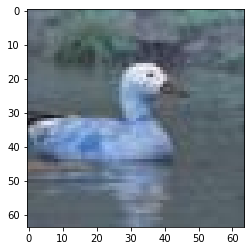

In [20]:
img = cv2.imread(train_csv.iloc[0,0])
plt.imshow(img)
plt.show()

In [21]:
img.shape

(64, 64, 3)

In [22]:
train_csv.shape

(15834, 3)

In [64]:
images =np.zeros(shape = (train_csv.shape[0],64,64,3))
labels =np.zeros(shape = (train_csv.shape[0],1)).astype(str)

In [67]:
labels

array([['Ruddy Shelduck'],
       ['Gray Wagtail'],
       ['Indian Peacock'],
       ...,
       ['Cattle Egret'],
       ['Ruddy Shelduck'],
       ['Forest Wagtail']], dtype='<U32')

In [65]:
# 백터화 
for i in range(train_csv.shape[0]) :

    try :
        image = cv2.imread(train_csv.iloc[i,0])
        (H, W) = image.shape[:2] # 이미지의 가로 세로만 추출
    except:
        continue
#     image = cv2.resize(image, (width, height))
#     cv2_imshow(image)
    # 백터로 변환
    images[i] = image

    labels[i] = train_csv.iloc[i,2]

In [63]:
images.shape, labels.shape

((15834, 64, 64, 3), (15834, 1))

In [29]:
64 * 64

4096

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [79]:
from tensorflow.keras.utils import to_categorical


ValueError: invalid literal for int() with base 10: 'Ruddy Shelduck'

In [81]:
labels_int = label_encoder.fit_transform(labels)
labels_encoded = to_categorical(labels_int, num_classes=25)

C:\Users\YJ_PC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [84]:
labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 데이터 분리

In [32]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, y_train, X_test, y_test = train_test_split(images, labels_encoded, test_size=0.3,
                                                   stratify= labels,
                                                   random_state = 2)

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11083, 64, 64, 3)
(4751, 64, 64, 3)
(11083, 25)
(4751, 25)


## 모델 생성

In [73]:
(6273+2) /2

3137.5

In [92]:
cnn = Sequential()

cnn.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(units = 3137, activation='relu'))
cnn.add(Dense(units = 3137, activation='relu'))
cnn.add(Dense(units = 25, activation='softmax'))

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 3137)              19678401  
_________________________________________________________________
dense_10 (Dense)             (None, 3137)             

In [93]:
cnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

## 모델 학습

In [95]:
history = cnn.fit(x = X_train, y = X_test, epochs = 50, batch_size = 32)

Epoch 1/50
347/347 [==============================] - 70s 201ms/step - loss: 2.1239 - accuracy: 0.3834
Epoch 2/50
347/347 [==============================] - 72s 208ms/step - loss: 1.4928 - accuracy: 0.5636
Epoch 3/50
347/347 [==============================] - 73s 211ms/step - loss: 0.9816 - accuracy: 0.7192
Epoch 4/50
347/347 [==============================] - 73s 212ms/step - loss: 0.8234 - accuracy: 0.7674
Epoch 5/50
347/347 [==============================] - 70s 202ms/step - loss: 0.5916 - accuracy: 0.8396
Epoch 6/50
347/347 [==============================] - 74s 214ms/step - loss: 0.3667 - accuracy: 0.9000
Epoch 7/50
347/347 [==============================] - 78s 225ms/step - loss: 0.2987 - accuracy: 0.9216
Epoch 8/50
347/347 [==============================] - 71s 205ms/step - loss: 0.3221 - accuracy: 0.9168
Epoch 9/50
347/347 [==============================] - 70s 202ms/step - loss: 0.4477 - accuracy: 0.8876
Epoch 10/50
347/347 [==============================] - 70s 203ms/step - l

### 모델 저장

In [96]:
import pickle

In [99]:
with open("first_model.dump","wb") as fw:
    pickle.dump(cnn, fw)

TypeError: cannot pickle 'weakref' object

In [ ]:
with open('LabelEncoder4Birds.dump','wb') as fw:
    pickle.dump(label_encoder, fw)

## 검증

In [111]:
pred = cnn.predict(y_train)

pred.shape

In [112]:
pred_val = np.argmax(pred,axis = 1)

In [113]:
pred_val

array([13,  7, 12, ...,  6, 13,  8], dtype=int64)

In [103]:
y_test.shape

(4751, 25)

In [114]:
y_test_val = np.argmax(y_test, axis = 1)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_val,pred_val)

0.15723005683014102

In [109]:
pred_label = label_encoder.inverse_transform(pred_val)
pred_label

array(['Indian Peacock', 'Coppersmith Barbet', 'Indian Grey Hornbill',
       ..., 'Common Tailorbird', 'Indian Peacock', 'Forest Wagtail'],
      dtype='<U32')

In [116]:
y_test_val

array([ 9, 16, 12, ...,  2, 23, 10], dtype=int64)

In [117]:
y_test_label = label_encoder.inverse_transform(y_test_val)

In [118]:
y_test_label

array(['Gray Wagtail', 'Jungle Babbler', 'Indian Grey Hornbill', ...,
       'Cattle Egret', 'White-Breasted Kingfisher', 'Hoopoe'],
      dtype='<U32')